## Importing Libraries

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
import pickle

## Image load and preprocess

In [2]:
def load_images_from_folder(folder):
    train_data=[]
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
        img=~img
        if img is not None:
            ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)

            ctrs,ret=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
            cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
            w=int(28)
            h=int(28)
            maxi=0
            for c in cnt:
                x,y,w,h=cv2.boundingRect(c)
                maxi=max(w*h,maxi)
                if maxi==w*h:
                    x_max=x
                    y_max=y
                    w_max=w
                    h_max=h
            im_crop= thresh[y_max:y_max+h_max+10, x_max:x_max+w_max+10]
            im_resize = cv2.resize(im_crop,(28,28))
            im_resize=np.reshape(im_resize,(784,1))
            train_data.append(im_resize)
    return train_data

In [3]:
data=[]
dic={'-':'10','+':'11','times':'12','0':'0','1':'1','2':'2','3':'4','5':'5','6':'6','7':'7','8':'8','9':'9'}

In [4]:
def myfunct(p,x,data):
    data1=load_images_from_folder('./extracted_images/'+p+'/')
    print('samples in',p,':',len(data1))
    for i in range(0,len(data1)):
        data1[i]=np.append(data1[i],[x])   
    if x=='10':
        data=data1
    else:
        data=np.concatenate((data,data1))
    return data

In [5]:
print("Inital length: ",len(data))
for i in dic:
    data=myfunct(i,dic[i],data)
    print("Length after appending ",i,':',len(data))

Inital length:  0
samples in - : 33997
Length after appending  - : 33997
samples in + : 25112
Length after appending  + : 59109
samples in times : 3251
Length after appending  times : 62360
samples in 0 : 6914
Length after appending  0 : 69274
samples in 1 : 26520
Length after appending  1 : 95794
samples in 2 : 26141
Length after appending  2 : 121935
samples in 3 : 10909
Length after appending  3 : 132844
samples in 5 : 3545
Length after appending  5 : 136389
samples in 6 : 3118
Length after appending  6 : 139507
samples in 7 : 2909
Length after appending  7 : 142416
samples in 8 : 3068
Length after appending  8 : 145484
samples in 9 : 3737
Length after appending  9 : 149221


In [6]:
df=pd.DataFrame(data,index=None)
df.to_csv('train_final.csv',index=False)

In [7]:
df_train=pd.read_csv('train_final.csv',index_col=False)
labels=df_train[['784']]

In [8]:
print("Number of samples for different labels")
labels.value_counts(sort=False)

Number of samples for different labels


784
0       6914
1      26520
2      26141
4      10909
5       3545
6       3118
7       2909
8       3068
9       3737
10     33997
11     25112
12      3251
dtype: int64

## Making dataset

In [9]:
df_train.drop(df_train.columns[[784]],axis=1,inplace=True)
df_train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
3,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
4,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,255,255,...,0,0,0,0,0,0,0,0,0,0
9,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0


In [11]:
import pandas as pd
import pickle as pkl
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
# K.set_image_dim_ordering('th')
from keras.utils.np_utils import to_categorical

In [12]:
labels=np.array(labels)
cat=to_categorical(labels,num_classes=len(dic)+1)

In [13]:
print(len(cat))

149221


In [14]:
print(len(cat[0]))

13


In [15]:
df_train.shape

(149221, 784)

In [16]:
28*28

784

In [17]:
temp=df_train.to_numpy()
X_train = temp.reshape(temp.shape[0], 28, 28, 1)
X_train.shape

(149221, 28, 28, 1)

In [18]:
l=[]
for i in range(149221):
    l.append(np.array(df_train[i:i+1]).reshape(1,28,28))

## Model creation

In [45]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28,1), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(13, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
tf.config.run_functions_eagerly(True)

In [50]:
model.fit(X_train, cat, epochs=10, batch_size=200,shuffle=True,verbose=1)

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\data\ops\structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/10
747/747 [==============================] - 155s 207ms/step - loss: 0.3176 - accuracy: 0.9190
Epoch 2/10
747/747 [==============================] - 166s 222ms/step - loss: 0.0610 - accuracy: 0.9830
Epoch 3/10
747/747 [==============================] - 157s 211ms/step - loss: 0.0364 - accuracy: 0.9895
Epoch 4/10
747/747 [==============================] - 163s 219ms/step - loss: 0.0272 - accuracy: 0.9923
Epoch 5/10
747/747 [==============================] - 204s 273ms/step - loss: 0.0230 - accuracy: 0.9931
Epoch 6/10
747/747 [==============================] - 207s 277ms/step - loss: 0.0192 - accuracy: 0.9943
Epoch 7/10
747/747 [==============================] - 456s 611ms/step - loss: 0.0168 - accuracy: 0.9950
Epoch 8/10
747/747 [==============================] - 164s 219ms/step - loss: 0.0144 - accuracy: 0.9957
Epoch 9/10
747/747 [==============================] - 173s 232ms/step - loss: 0.0132 - accuracy: 0.9960
Epoch 10/10
747/747 [==============================] - 180s 241m

## saving model

In [54]:
pkl.dump(model,open('model.pkl','wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dropout
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-01-2

In [55]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 15)        4335      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 15)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 6, 6, 15)          0         
                                                                 
 flatten_2 (Flatten)         (None, 540)              

In [19]:
model=pkl.load(open('model.pkl','rb'))
model.summary()

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-01-21 19:47:50         3660
metadata.json                                  2023-01-21 19:47:50           64
variables.h5                                   2023-01-21 19:47:52      1009504
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dropout
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.......

## Testing model

In [20]:
import cv2
import numpy as np
img = cv2.imread('test.jpg',cv2.IMREAD_GRAYSCALE)

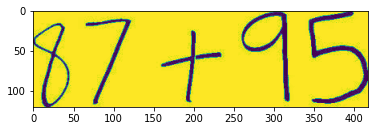

In [21]:
plt.imshow(img)

In [22]:
if img is not None:
    img=~img
    ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ctrs,ret=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w=int(28)
    h=int(28)
    train_data=[]
    print(len(cnt))
    rects=[]
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)
    print(rects)
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    print(bool_rect)
    dump_rect=[]
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if(area1==min(area1,area2)):
                    dump_rect.append(rects[i])
    print(len(dump_rect)) 
    final_rect=[i for i in rects if i not in dump_rect]
    print(final_rect)
    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y:y+h+10,x:x+w+10]
        im_resize = cv2.resize(im_crop,(28,28))
        im_resize=np.reshape(im_resize,(28,28,1))
        train_data.append(im_resize)


9
[[0, 16, 45, 104], [2, 18, 35, 35], [15, 57, 29, 60], [66, 11, 56, 105], [160, 26, 43, 88], [203, 52, 32, 9], [261, 2, 59, 111], [262, 6, 50, 42], [344, 0, 74, 116]]
[[0, 1, 1, 0, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]
5
[[0, 16, 45, 104], [66, 11, 56, 105], [160, 26, 43, 88], [261, 2, 59, 111], [344, 0, 74, 116]]


In [23]:
equation=''
for i in range(len(train_data)):
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)
    result=np.argmax(model.predict(train_data[i]), axis=-1)
    if(result[0]==10):
        equation = equation +'-'
    if(result[0]==11):
        equation = equation +'+'
    if(result[0]==12):
        equation = equation +'*'
    if(result[0]==0):
        equation = equation +'0'
    if(result[0]==1):
        equation = equation +'1'
    if(result[0]==2):
        equation = equation +'2'
    if(result[0]==3):
        equation = equation +'3'
    if(result[0]==4):
        equation = equation +'4'
    if(result[0]==5):
        equation = equation +'5'
    if(result[0]==6):
        equation = equation +'6'
    if(result[0]==7):
        equation = equation +'7'
    if(result[0]==8):
        equation = equation +'8'
    if(result[0]==9):
        equation = equation +'9'
    
print(equation)

1/1 [==============================] - 0s 13ms/step
87+95


In [24]:
eval(equation)

182